In [1]:

%matplotlib inline


# Transoffset


This illustrates the use of transforms.offset_copy to
make a transform that positions a drawing element such as
a text string at a specified offset in screen coordinates
(dots or inches) relative to a location given in any
coordinates.

Every Artist--the mpl class from which classes such as
Text and Line are derived--has a transform that can be
set when the Artist is created, such as by the corresponding
pyplot command.  By default this is usually the Axes.transData
transform, going from data units to screen dots.  We can
use the offset_copy function to make a modified copy of
this transform, where the modification consists of an
offset.



In [2]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.transforms as mtransforms
import numpy as np

In [3]:

xs = np.arange(7)
ys = xs**2

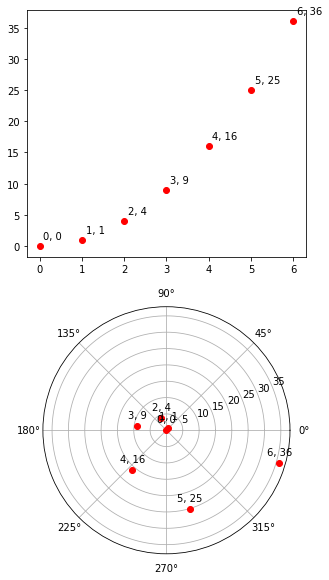

In [4]:

fig = plt.figure(figsize=(5, 10))
ax = plt.subplot(2, 1, 1)

# If we want the same offset for each text instance,
# we only need to make one transform.  To get the
# transform argument to offset_copy, we need to make the axes
# first; the subplot command above is one way to do this.
trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       x=0.05, y=0.10, units='inches')

for x, y in zip(xs, ys):
    plt.plot((x,), (y,), 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)), transform=trans_offset)

# Offset_copy works for polar plots also.
ax = plt.subplot(2, 1, 2, projection='polar')

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(xs, ys):
    plt.polar((x,), (y,), 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

In [5]:

plt.polar?